## Loading Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pickle
import tensorflow as tf
from tensorflow import keras
import os
import math
from math import ceil
import keras
np.random.seed(1337)

from keras import backend as K
from keras.layers import Layer
from keras import activations
from keras import utils
from keras.datasets import cifar10

from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
import os

#from keras.applications.imagenet_utils import _obtain_input_shape
from keras.models import Model
from keras.layers import Activation, Add, Concatenate, Conv2D, GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D,Input, Dense
from keras.layers import MaxPooling2D,AveragePooling2D, BatchNormalization, Lambda, DepthwiseConv2D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input,merge,LSTM,Concatenate
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D,ZeroPadding2D,AveragePooling2D
from keras.layers import BatchNormalization,Reshape
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from PIL import Image
import cv2
import pandas as pd

from warnings import filterwarnings
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
filterwarnings('ignore')
from sklearn.model_selection import train_test_split


# Flower Species Classification

## Training Data Loading

In [3]:
data_train=np.load('flower_species_classification/data_train.npy')
data_train=np.reshape(data_train,(300,300,3,data_train.shape[1]))
data_train=np.moveaxis(data_train, -1, 0)
print(data_train.shape)

(1658, 300, 300, 3)


## Normalization

In [4]:
data_train=data_train/255

## Label One-Hot Encoding

In [5]:
label_train=np.load('flower_species_classification/labels_train.npy')
t_train=np_utils.to_categorical(label_train, 10)

## Neural Network Architecture for Classification

In [27]:
input_shape=(300,300,3)
img_input = Input(shape=input_shape)
layer_no=6
activation_function='relu'
filter_size=4

print( "# of layers: ",layer_no)
print( "Activation Function: ",activation_function)
print( "Filter Size: ", filter_size)

x = Conv2D(16, (filter_size,filter_size), kernel_initializer='he_uniform', activation=activation_function, padding='same', name='block1_conv1')(img_input)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size,filter_size), strides=(2,2), name='block1_pool')(x)
x=Dropout(0.1)(x)
        # 2nd convolutional block
x = Conv2D(32, (filter_size,filter_size), kernel_initializer='he_uniform', activation=activation_function, padding='same', name='block2_conv1')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size,filter_size), strides=(2,2), name='block2_pool')(x)
x=Dropout(0.1)(x)


x = Conv2D(64, (filter_size,filter_size), kernel_initializer='he_uniform', activation=activation_function, padding='same', name='block3_conv1')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size,filter_size), strides=(2,2), name='block3_pool')(x)
x=Dropout(0.1)(x)

if layer_no>3:
    x = Conv2D(128, (filter_size,filter_size), kernel_initializer='he_uniform', activation=activation_function, padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D((filter_size,filter_size), strides=(2,2), name='block4_pool')(x)
    x=Dropout(.1)(x) 

    if layer_no>4:
        x = Conv2D(256, (filter_size,filter_size), kernel_initializer='he_uniform', activation=activation_function, padding='same', name='block5_conv1')(x)
        x = BatchNormalization()(x)
        x = AveragePooling2D((filter_size,filter_size), strides=(2,2), name='block5_pool')(x)
        x=Dropout(.1)(x)
        if layer_no>5:
            x = Conv2D(512, (filter_size,filter_size), kernel_initializer='he_uniform', activation=activation_function, padding='same', name='block6_conv1')(x)
            x = BatchNormalization()(x)
            x = AveragePooling2D((filter_size,filter_size), strides=(2,2), name='block6_pool')(x)
            x=Dropout(.1)(x)
            if layer_no>6:
                x = Conv2D(1024, (filter_size,filter_size), kernel_initializer='he_uniform', activation=activation_function, padding='same', name='block7_conv1')(x)
                x = BatchNormalization()(x)
                x = AveragePooling2D((filter_size,filter_size), strides=(2,2), name='block7_pool')(x)
                x=Dropout(.1)(x)

x = Flatten(name='flatten')(x)

x=Dense(256,activation=activation_function)(x)
x=BatchNormalization()(x)
x=Dropout(.1)(x)    

x=Dense(128,activation=activation_function)(x)
x=BatchNormalization()(x)
x=Dropout(.1)(x)  

out=Dense(10, activation= "softmax")(x)

merged_model=Model(inputs=img_input ,outputs=out)
lr=0.00001
adam=tf.keras.optimizers.Adam(
    learning_rate=lr,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)

merged_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
save_path='flower_species_classification/prob1_'+activation_function+'_layers'+str(layer_no)+'_filtersize'+str(filter_size)+'_lr_'+str(lr)
checkpoint=[ModelCheckpoint(filepath=save_path+'.hdf5',  monitor='val_loss', save_best_only=True, mode='min',verbose=1)]

hist_train=merged_model.fit(data_train,t_train,callbacks=checkpoint, batch_size=32,epochs=100, shuffle=True,verbose=0,validation_split=.1)
with open(save_path+'_trainHistory.pkl', 'wb') as file_pi:
    pickle.dump(hist_train.history, file_pi)
print('Training Done')

# of layers:  6
Activation Function:  relu
Filter Size:  4

Epoch 00001: val_loss improved from inf to 2.55213, saving model to flower_species_classification/prob1_relu_layers6_filtersize4_lr_1e-05.hdf5

Epoch 00002: val_loss improved from 2.55213 to 2.02935, saving model to flower_species_classification/prob1_relu_layers6_filtersize4_lr_1e-05.hdf5

Epoch 00003: val_loss improved from 2.02935 to 1.69491, saving model to flower_species_classification/prob1_relu_layers6_filtersize4_lr_1e-05.hdf5

Epoch 00004: val_loss improved from 1.69491 to 1.38292, saving model to flower_species_classification/prob1_relu_layers6_filtersize4_lr_1e-05.hdf5

Epoch 00005: val_loss improved from 1.38292 to 1.15406, saving model to flower_species_classification/prob1_relu_layers6_filtersize4_lr_1e-05.hdf5

Epoch 00006: val_loss improved from 1.15406 to 1.03413, saving model to flower_species_classification/prob1_relu_layers6_filtersize4_lr_1e-05.hdf5

Epoch 00007: val_loss improved from 1.03413 to 0.89964, 

## Learning Curves for Training and Validation Loss and Accuracy

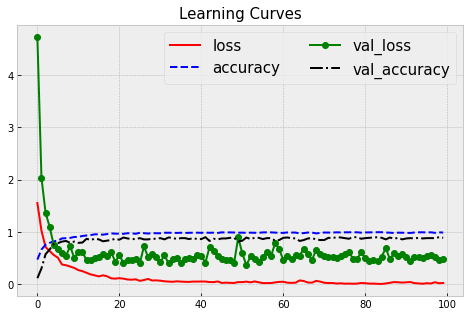

In [60]:
layer_no=6
activation_function='relu'
filter_size=4
lr=0.0001
save_path='flower_species_classification/prob1_'+activation_function+'_layers'+str(layer_no)+'_filtersize'+str(filter_size)+'_lr_'+str(lr)

with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
    hist_train = pickle.load(file_pi)

key_names = list(hist_train.keys())
colors = ['-r','--b','-og','-.k']

plt.figure(figsize=(8,5))
for i in range(len(key_names)):
    plt.plot(hist_train[key_names[i]], colors[i], label=key_names[i])
plt.legend(fontsize=15,ncol=2)
plt.title('Learning Curves', size=15);

## Learning Curves for Validation Loss with change of number of layers

Text(0.5, 1.0, 'Best Choice is: 6')

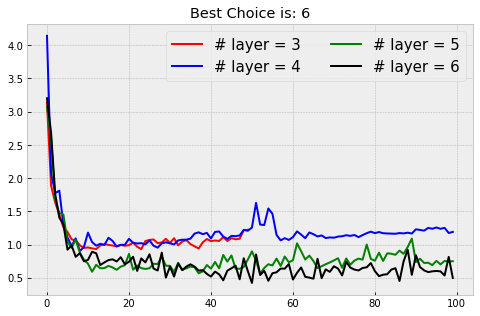

In [39]:
layer_no=6
activation_function='selu'
filter_size=4

colors = ['-r','-b','-g','-k']
plt.figure(figsize=(8,5))
j=0
loss_list=[]
layer_nos=['3','4','5','6']
for layer_no in layer_nos:
    save_path='flower_species_classification/prob1_'+activation_function+'_layers'+str(layer_no)+'_filtersize'+str(filter_size)
    with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
        hist_train = pickle.load(file_pi)
    key_names = list(hist_train.keys())


    
    for i in [2]:
        plt.plot(hist_train[key_names[i]], colors[j], label='# layer = '+str(layer_no))
        loss_list.append(min(hist_train[key_names[i]]))

    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves', size=15);
    j=j+1
plt.title('Learning Curves for Validation Loss', size=15);
plt.title('Best Choice is: '+ layer_nos[np.argmin(loss_list)])

## Learning Curves for Validation Loss with change of number of filtersize

Text(0.5, 1.0, 'Best Choice is: 4')

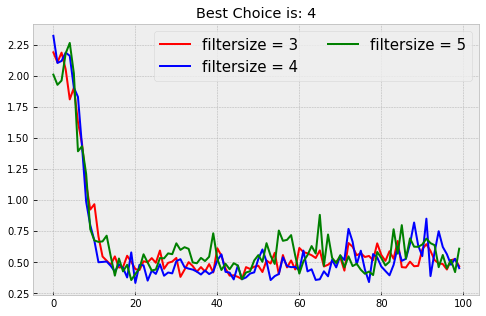

In [50]:
layer_no=6
activation_function='relu'

colors = ['-r','-b','-g','-k']
plt.figure(figsize=(8,5))
j=0
loss_list=[]
filter_sizes=['3','4','5']
for filter_size in filter_sizes:
    save_path='flower_species_classification/prob1_'+activation_function+'_layers'+str(layer_no)+'_filtersize'+str(filter_size)
    with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
        hist_train = pickle.load(file_pi)
    key_names = list(hist_train.keys())


    
    for i in [2]:
        plt.plot(hist_train[key_names[i]], colors[j], label='filtersize = '+str(filter_size))
        loss_list.append(min(hist_train[key_names[i]]))

    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves', size=15);
    j=j+1
plt.title('Learning Curves for Validation Loss', size=15);
plt.title('Best Choice is: ' + filter_sizes[np.argmin(loss_list)])

## Learning Curves for Validation Loss with change of activation function

Text(0.5, 1.0, 'Best Choice is: relu')

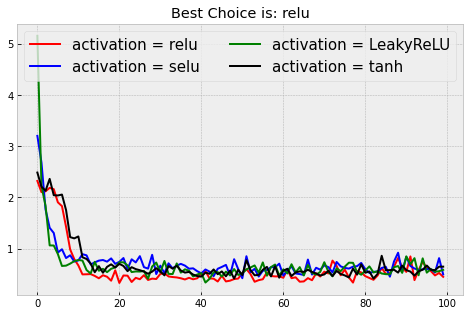

In [43]:
layer_no=6
activation_functions=['relu','selu','LeakyReLU','tanh']
filter_size=4
colors = ['-r','-b','-g','-k']
plt.figure(figsize=(8,5))
j=0
loss_list=[]
for activation_function in activation_functions:
    save_path='flower_species_classification/prob1_'+activation_function+'_layers'+str(layer_no)+'_filtersize'+str(filter_size)
    with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
        hist_train = pickle.load(file_pi)
    key_names = list(hist_train.keys())


    
    for i in [2]:
        plt.plot(hist_train[key_names[i]], colors[j], label='activation = '+str(activation_function))
        loss_list.append(min(hist_train[key_names[i]]))

    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves', size=15);
    j=j+1
plt.title('Learning Curves for Validation Loss', size=15);
plt.title('Best Choice is: ' + activation_functions[np.argmin(loss_list)])

## Learning Curves for Validation Loss with change of LR

Text(0.5, 1.0, 'Best Choice is: 0.0001')

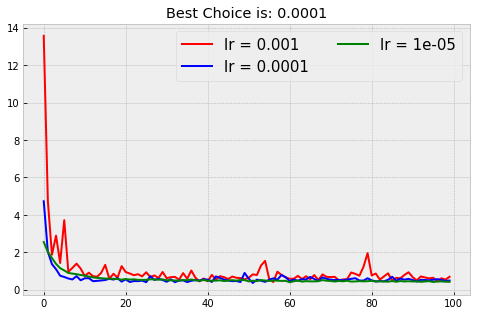

In [52]:
layer_no=6
activation_function='relu'
filter_size=4
colors = ['-r','-b','-g','-k']
plt.figure(figsize=(8,5))
j=0
learning_rates=[0.001,0.0001,0.00001]
loss_list=[]
for lr in learning_rates:
    save_path='flower_species_classification/prob1_'+activation_function+'_layers'+str(layer_no)+'_filtersize'+str(filter_size)+'_lr_'+str(lr)
    with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
        hist_train = pickle.load(file_pi)
    key_names = list(hist_train.keys())


    
    for i in [2]:
        plt.plot(hist_train[key_names[i]], colors[j], label='lr = '+str(lr))
        loss_list.append(min(hist_train[key_names[i]]))
    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves', size=15);
    j=j+1
plt.title('Learning Curves for Validation Loss', size=15);
plt.title('Best Choice is: ' + str(learning_rates[np.argmin(loss_list)]))

## Evaluation and Prediction on Trining Set

In [55]:
final_model.evaluate(data_train,t_train,batch_size=1,verbose=1)
prediction=final_model.predict(data_train,batch_size=1)
prediction_labels=np.argmax(prediction,axis=1)

1658/1658 [==============================] - 35s 21ms/step - loss: 0.0509 - accuracy: 0.9867


## Classification Report of Training

In [57]:
print(classification_report(label_train,prediction_labels))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       177
         1.0       0.98      1.00      0.99       180
         2.0       0.99      0.95      0.97       205
         3.0       1.00      1.00      1.00       140
         4.0       0.97      0.99      0.98       173
         5.0       0.99      0.99      0.99       156
         6.0       0.98      0.99      0.99       160
         7.0       0.98      0.99      0.99       172
         8.0       1.00      0.99      1.00       162
         9.0       0.99      0.97      0.98       133

    accuracy                           0.99      1658
   macro avg       0.99      0.99      0.99      1658
weighted avg       0.99      0.99      0.99      1658



## Confusion Matrix of Training

Confusion matrix, without normalization


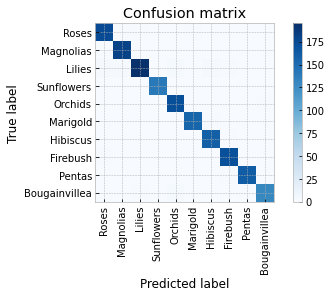

In [56]:
def plot_confusion_matrix(cm, classes,
                              normalize=True,include_values=True,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues,values_format=None):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

   
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']
cnf_matrix = (confusion_matrix(label_train,prediction_labels))

plot_confusion_matrix(cnf_matrix,classes=class_names,
                          normalize=False,include_values=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,values_format=None)

# Car Detection Dataset

# Training Data Load

In [9]:
bbox = pd.read_csv('car_detection_dataset/train_bounding_boxes_modified.csv')
N = len(bbox) # no. of training samples
# Create a numpy array with all images
for i in range(N): 
    filename='car_detection_dataset/training_images/'+bbox['image'][i]
    image = np.array(Image.open(filename))
    image_col = image.ravel()[:,np.newaxis]
    if i==0:
        X_train = image_col
    else:
        X_train = np.hstack((X_train, image_col))

# Training feature matrices
X_train = X_train.T

# Training labels
t_train = bbox.drop('image', axis=1).round().to_numpy().astype(int)
print( "Shape of training dataset:", X_train.shape)
print( "Shape of training labels:", t_train.shape)
(Ny,Nx,Nz) = image.shape
print( "Shape of an image:", Nx, Ny, Nz)


X_train=np.reshape(X_train,(X_train.shape[0],Nx,Ny,Nz))
from skimage.feature import hog

size_correction=0.60
Nx_resize=int(380*size_correction)
Ny_resize=int(676*size_correction)
X_train_resize=np.zeros((X_train.shape[0],Nx_resize,Ny_resize,3))
print( "Shape of a resized image:", Ny_resize, Nx_resize, Nz)

for i in range(X_train.shape[0]):
    X_train_resize[i,:,:,0]=cv2.resize(X_train[i,:,:,0],(Ny_resize,Nx_resize))
    X_train_resize[i,:,:,1]=cv2.resize(X_train[i,:,:,1],(Ny_resize,Nx_resize))
    X_train_resize[i,:,:,2]=cv2.resize(X_train[i,:,:,2],(Ny_resize,Nx_resize))

X_train=np.array(X_train_resize)
X_train_resize=None

Shape of training dataset: (896, 770640)
Shape of training labels: (896, 4)
Shape of an image: 676 380 3
Shape of a resized image: 405 228 3


## Normalization of images and labels

In [4]:
X_train=np.reshape(X_train,(X_train.shape[0],Nx_resize,Ny_resize,3))
X_train = X_train/255
t_train = bbox.drop('image', axis=1).to_numpy().astype('float32')
t_train[:,0] = t_train[:,0]/Nx
t_train[:,1] = t_train[:,1]/Ny
t_train[:,2] = t_train[:,2]/Nx
t_train[:,3] = t_train[:,3]/Ny
X_train, X_val, t_train, t_val= train_test_split(X_train,t_train,test_size=0.2,shuffle=True,random_state=1971)

## first neural network to detect points along y-axis (ymin and ymax)

In [38]:
input_shape=(Nx_resize,Ny_resize,3)
img_input = Input(shape=input_shape)
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
print( "# of layers: ",layer_no)
print( "Activation Function: ",activation_function)
print( "Filter Size: ", (filter_size1,filter_size2))

x = Conv2D(32, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block1_conv1')(img_input)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block1_pool')(x)
x=Dropout(0.1)(x)
        # 2nd convolutional block
x = Conv2D(64, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function,  name='block2_conv1')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block2_pool')(x)
x=Dropout(0.1)(x)


x = Conv2D(128, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function,  name='block3_conv1')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block3_pool')(x)
x=Dropout(0.1)(x)

if layer_no>3:
    x = Conv2D(256, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block4_pool')(x)
    x=Dropout(.1)(x) 

    if layer_no>4:
        x = Conv2D(512, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block5_conv1')(x)
        x = BatchNormalization()(x)
        x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block5_pool')(x)
        x=Dropout(.1)(x)
        if layer_no>5:
            x = Conv2D(1024, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block6_conv1')(x)
            x = BatchNormalization()(x)
            #x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block6_pool')(x)
            x=Dropout(.1)(x)
            if layer_no>6:
                x = Conv2D(1024, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block7_conv1')(x)
                x = BatchNormalization()(x)
                x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block7_pool')(x)
                x=Dropout(.1)(x)

x = Flatten(name='flatten')(x)

        # Classification part

x=Dense(256,activation=activation_function)(x)
x=BatchNormalization()(x)
x=Dropout(.1)(x)    

x=Dense(128,activation=activation_function)(x)
x=BatchNormalization()(x)
x=Dropout(.1)(x)  

x=Dense(64,activation=activation_function)(x)
x=BatchNormalization()(x)
x=Dropout(.1)(x) 

#x = Dense(15, kernel_initializer='he_uniform', activation='selu', name='fc3')(x)
out=Dense(2, activation= "sigmoid")(x)
model2=Model(inputs=img_input ,outputs=out)
lr=0.001
adam=tf.keras.optimizers.Adam(
    learning_rate=lr,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)
batch_size=64
model2.compile(loss='mse', optimizer=adam, metrics=['mae','mse'])
save_path='new_prob2_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)+'_bz'+str(batch_size)
checkpoint=[ModelCheckpoint(filepath=save_path+'.hdf5',  monitor='val_loss', save_best_only=True, mode='min',verbose=1)]

hist_train=model2.fit(X_train,t_train[:,1:4:2],callbacks=checkpoint, batch_size=batch_size,epochs=200, shuffle=True,verbose=0,validation_data=(X_val,t_val[:,1:4:2]))
with open(save_path+'_trainHistory.pkl', 'wb') as file_pi:
    pickle.dump(hist_train.history, file_pi)
print('Training Done')

# of layers:  6
Activation Function:  relu
Filter Size:  (3, 3)

Epoch 00001: val_loss improved from inf to 0.20293, saving model to new_prob2_relu_layers6_lr_0.001_stride_2_bz64.hdf5

Epoch 00002: val_loss did not improve from 0.20293

Epoch 00003: val_loss did not improve from 0.20293

Epoch 00004: val_loss did not improve from 0.20293

Epoch 00005: val_loss did not improve from 0.20293

Epoch 00006: val_loss did not improve from 0.20293

Epoch 00007: val_loss did not improve from 0.20293

Epoch 00008: val_loss improved from 0.20293 to 0.19007, saving model to new_prob2_relu_layers6_lr_0.001_stride_2_bz64.hdf5

Epoch 00009: val_loss improved from 0.19007 to 0.17864, saving model to new_prob2_relu_layers6_lr_0.001_stride_2_bz64.hdf5

Epoch 00010: val_loss improved from 0.17864 to 0.09562, saving model to new_prob2_relu_layers6_lr_0.001_stride_2_bz64.hdf5

Epoch 00011: val_loss did not improve from 0.09562

Epoch 00012: val_loss improved from 0.09562 to 0.09370, saving model to new_pro

## Learning curve for best network of model1

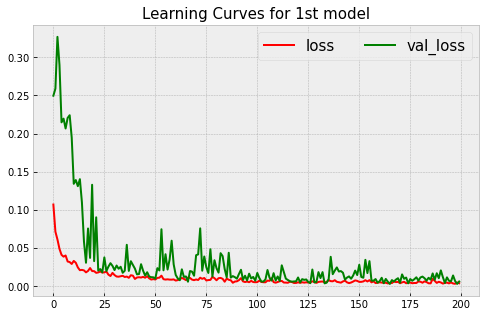

In [47]:
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
lr=0.001
batch_size=32
save_path='new_prob2_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)+'_bz_'+str(batch_size)
with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
    hist_train = pickle.load(file_pi)
key_names = list(hist_train.keys())
colors = ['-r','--b','-w,','-g']

plt.figure(figsize=(8,5))
for i in [0,3]:
    plt.plot(hist_train[key_names[i]], colors[i], label=key_names[i])
plt.legend(fontsize=15,ncol=2)
plt.title('Learning Curves for 1st model', size=15);

## Learning curve for networks of model1 with different number of layers

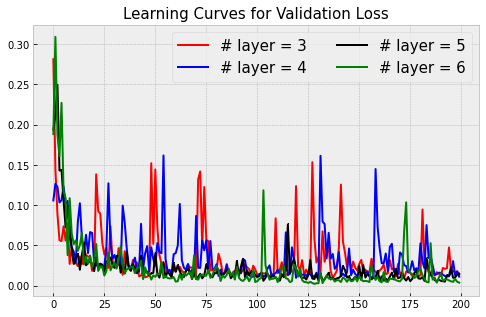

In [48]:
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
lr=0.001
colors = ['-r','-b','-k,','-g']
plt.figure(figsize=(8,5))
j=0
for layer_no in range(3,7):
    save_path='new_prob2_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)
    with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
        hist_train = pickle.load(file_pi)
    key_names = list(hist_train.keys())


    
    for i in [3]:
        plt.plot(hist_train[key_names[i]], colors[j], label='# layer = '+str(layer_no))
    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves', size=15);
    j=j+1
plt.title('Learning Curves for Validation Loss', size=15);

## Learning curve for networks of model1 with different number of batch size

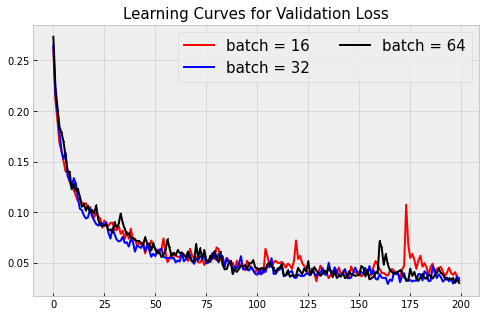

In [46]:
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
lr=0.001
batch_size_list=[16,32,64]
colors = ['-r','-b','-k,','-g']
plt.figure(figsize=(8,5))
j=0
for batch_size in batch_size_list:
    save_path='new_prob2_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)+'_bz_'+str(batch_size)
    with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
        hist_train = pickle.load(file_pi)
    key_names = list(hist_train.keys())


    
    for i in [1]:
        plt.plot(hist_train[key_names[i]], colors[j], label='batch = '+str(batch_size))
    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves', size=15);
    j=j+1
plt.title('Learning Curves for Validation Loss', size=15);

## Learning curve for networks of model1 with different learning rates

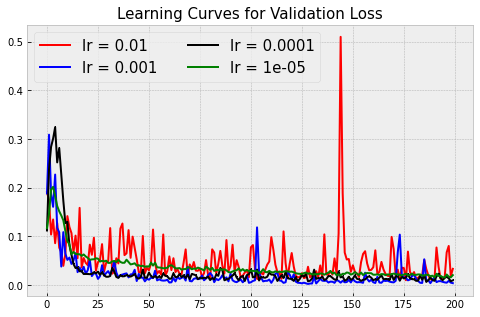

In [49]:
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
learning_rate=[0.01,0.001,0.0001,0.00001]
colors = ['-r','-b','-k,','-g']
plt.figure(figsize=(8,5))
j=0
for lr in learning_rate:
    save_path='new_prob2_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)
    with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
        hist_train = pickle.load(file_pi)
    key_names = list(hist_train.keys())


    
    for i in [3]:
        plt.plot(hist_train[key_names[i]], colors[j], label='lr = '+str(lr))
    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves', size=15);
    j=j+1
plt.title('Learning Curves for Validation Loss', size=15);

## Learning curve for networks of model1 with different activation functions

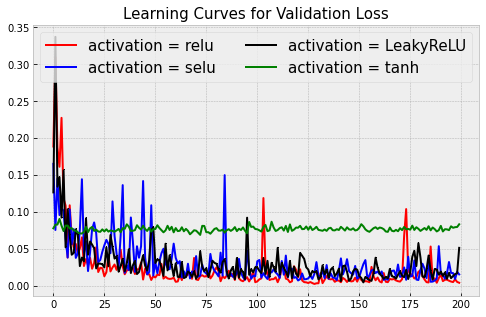

In [50]:
layer_no=6
activation_functions=['relu','selu','LeakyReLU','tanh']
filter_size1=3
filter_size2=3
stride1=2
stride2=2
learning_rate=[0.01,0.001,0.0001,0.00001]
colors = ['-r','-b','-k,','-g']
lr=0.001
plt.figure(figsize=(8,5))
j=0
for activation_function in activation_functions:
    save_path='new_prob2_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)
    with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
        hist_train = pickle.load(file_pi)
    key_names = list(hist_train.keys())


    
    for i in [3]:
        plt.plot(hist_train[key_names[i]], colors[j], label='activation = '+str(activation_function))
    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves', size=15);
    j=j+1
plt.title('Learning Curves for Validation Loss', size=15);

## Prediction and evaluation on training and validation set for model for prediction of ymin and ymax

In [5]:
lr=0.001
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
batch_size=32
save_path='new_prob2_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)+'_bz_'+str(batch_size)
from keras.models import load_model
final_model=load_model(save_path+'.hdf5')
#validation
print('Validation Evaluation')
final_model.evaluate(X_val,t_val[:,1:4:2],batch_size=1,verbose=1)

prediction_val=final_model.predict(X_val,batch_size=1)
prediction_train=final_model.predict(X_train,batch_size=1)

prediction_val_unscaled=np.zeros((prediction_val.shape[0],4))
prediction_val_unscaled[:,1]=prediction_val[:,0]*Ny
prediction_val_unscaled[:,3]=prediction_val[:,1]*Ny
prediction_val_unscaled = prediction_val_unscaled.round()

#train
print('Training Evaluation')
final_model.evaluate(X_train,t_train[:,1:4:2],batch_size=1,verbose=1)

prediction_train_unscaled=np.zeros((prediction_train.shape[0],4))
prediction_train_unscaled[:,1]=prediction_train[:,0]*Ny
prediction_train_unscaled[:,3]=prediction_train[:,1]*Ny
prediction_train_unscaled = prediction_train_unscaled.round()

t_train_unscaled=np.zeros((t_train.shape[0],4))
t_train_unscaled[:,1]=t_train[:,1]*Ny
t_train_unscaled[:,3]=t_train[:,3]*Ny
t_train_unscaled=t_train_unscaled.round()

t_val_unscaled=np.zeros((t_val.shape[0],4))
t_val_unscaled[:,1]=t_val[:,1]*Ny
t_val_unscaled[:,3]=t_val[:,3]*Ny
t_val_unscaled=t_val_unscaled.round()



2022-12-10 20:02:30.921437: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 20:02:31.452847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:90:00.0, compute capability: 8.0


Validation Evaluation


2022-12-10 20:02:33.387161: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-12-10 20:02:34.329088: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2022-12-10 20:02:34.461412: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


 75/180 [===========>..................] - ETA: 0s - loss: 0.0019 - mae: 0.0245 - mse: 0.0019        

2022-12-10 20:02:35.358653: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


180/180 [==============================] - 3s 2ms/step - loss: 0.0025 - mae: 0.0246 - mse: 0.0025
Training Evaluation
716/716 [==============================] - 1s 2ms/step - loss: 0.0020 - mae: 0.0203 - mse: 0.0020


## post-processing on validation set

In [6]:
prediction_val_model1=final_model.predict(X_val,batch_size=1,verbose=1)
for i in range(len(prediction_val_model1)):
    if prediction_val_model1[i,0]+prediction_val_model1[i,1] < 0.4:
        prediction_val_unscaled[i,1]=0
        prediction_val_unscaled[i,3]=0

180/180 [==============================] - 0s 2ms/step


## Loading HOG images of training and test set for predicting Xmin and Xmax

In [6]:
X_train_hog=np.load('X_train_hog.npy')
X_val_hog=np.load('X_val_hog.npy')
t_train=np.load('t_train.npy')
t_val=np.load('t_val.npy')

## Preprocessing
Creating mask in HOG images. It makes the pixels zero those are out of ymin and ymax

In [10]:
for i in range(X_train.shape[0]):    
    X_train_hog[i,0:int(t_train_unscaled[i,1]*size_correction),:]=0
    X_train_hog[i,int(t_train_unscaled[i,3]*size_correction):,:]=0

for i in range(X_val.shape[0]):    
    X_val_hog[i,0:int(t_val_unscaled[i,1]*size_correction),:]=0
    X_val_hog[i,int(t_val_unscaled[i,3]*size_correction):,:]=0

## Model2 for predicting Xmin and Xmax

In [11]:
size_correction=.60
Nx_resize=int(380*size_correction)
Ny_resize=int(676*size_correction)
input_shape=(Nx_resize,Ny_resize,1)
img_input = Input(shape=input_shape)
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
print( "# of layers: ",layer_no)
print( "Activation Function: ",activation_function)
print( "Filter Size: ", (filter_size1,filter_size2))

x = Conv2D(32, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block1_conv1')(img_input)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block1_pool')(x)
x=Dropout(0.1)(x)
        # 2nd convolutional block
x = Conv2D(64, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function,  name='block2_conv1')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block2_pool')(x)
x=Dropout(0.1)(x)


x = Conv2D(128, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function,  name='block3_conv1')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block3_pool')(x)
x=Dropout(0.1)(x)

if layer_no>3:
    x = Conv2D(256, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block4_pool')(x)
    x=Dropout(.1)(x) 

    if layer_no>4:
        x = Conv2D(512, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block5_conv1')(x)
        x = BatchNormalization()(x)
        x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block5_pool')(x)
        x=Dropout(.1)(x)
        if layer_no>5:
            x = Conv2D(1024, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block6_conv1')(x)
            x = BatchNormalization()(x)
            #x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block6_pool')(x)
            x=Dropout(.1)(x)
            if layer_no>6:
                x = Conv2D(1024, (filter_size1,filter_size2), kernel_initializer='he_uniform', activation=activation_function, name='block7_conv1')(x)
                x = BatchNormalization()(x)
                x = AveragePooling2D((filter_size1,filter_size2), strides=(stride1,stride2), name='block7_pool')(x)
                x=Dropout(.1)(x)

x = Flatten(name='flatten')(x)

        # Classification part

x=Dense(256,activation=activation_function)(x)
x=BatchNormalization()(x)
x=Dropout(.1)(x)    

x=Dense(128,activation=activation_function)(x)
x=BatchNormalization()(x)
x=Dropout(.1)(x)  

x=Dense(64,activation=activation_function)(x)
x=BatchNormalization()(x)
x=Dropout(.1)(x) 

out=Dense(2, activation= "sigmoid")(x)
#out2=Dense(1)(out1)
model2=Model(inputs=img_input ,outputs=out)
#optimizer = RMSprop(lr=0.001)
lr=0.001
#sgd = optimizers.SGD(lr=.0001)
adam=tf.keras.optimizers.Adam(
    learning_rate=lr,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)
batch_size=16
model2.compile(loss='mse', optimizer=adam, metrics=['mse'])
#merged_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
save_path='new_prob2_x_dir_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)+'_bz'+str(batch_size)
checkpoint=[ModelCheckpoint(filepath=save_path+'.hdf5',  monitor='val_loss', save_best_only=True, mode='min',verbose=1)]

hist_train=model2.fit(X_train_hog,t_train[:,0:4:2],callbacks=checkpoint, batch_size=batch_size,epochs=100, shuffle=True,verbose=0,validation_data=(X_val_hog,t_val[:,0:4:2]))
with open(save_path+'_trainHistory.pkl', 'wb') as file_pi:
    pickle.dump(hist_train.history, file_pi)
print('Training Done')

# of layers:  6
Activation Function:  relu
Filter Size:  (3, 3)

Epoch 00001: val_loss improved from inf to 0.15049, saving model to new_prob2_x_dir_relu_layers6_lr_0.001_stride_2_bz16.hdf5

Epoch 00002: val_loss improved from 0.15049 to 0.12651, saving model to new_prob2_x_dir_relu_layers6_lr_0.001_stride_2_bz16.hdf5

Epoch 00003: val_loss did not improve from 0.12651

Epoch 00004: val_loss did not improve from 0.12651

Epoch 00005: val_loss improved from 0.12651 to 0.12401, saving model to new_prob2_x_dir_relu_layers6_lr_0.001_stride_2_bz16.hdf5

Epoch 00006: val_loss did not improve from 0.12401

Epoch 00007: val_loss improved from 0.12401 to 0.12216, saving model to new_prob2_x_dir_relu_layers6_lr_0.001_stride_2_bz16.hdf5

Epoch 00008: val_loss improved from 0.12216 to 0.10558, saving model to new_prob2_x_dir_relu_layers6_lr_0.001_stride_2_bz16.hdf5

Epoch 00009: val_loss did not improve from 0.10558

Epoch 00010: val_loss improved from 0.10558 to 0.09033, saving model to new_prob2

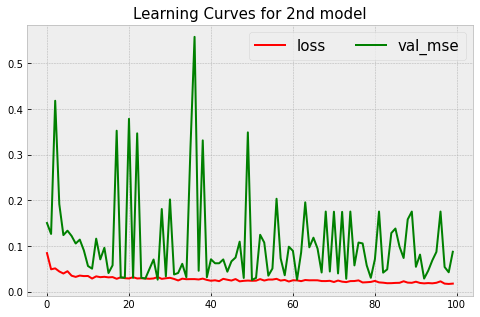

In [8]:
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
lr=0.001
batch_size=16
save_path='new_prob2_x_dir_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)+'_bz'+str(batch_size)
with open(save_path+'_trainHistory.pkl', 'rb') as file_pi:
    hist_train = pickle.load(file_pi)
key_names = list(hist_train.keys())
colors = ['-r','--b','-w,','-g']

plt.figure(figsize=(8,5))
for i in [0,3]:
    plt.plot(hist_train[key_names[i]], colors[i], label=key_names[i])
plt.legend(fontsize=15,ncol=2)
plt.title('Learning Curves for 2nd model', size=15);

## Prediction and evaluation on training and validation set for model for prediction of xmin and xmax

In [12]:
layer_no=6
activation_function='relu'
filter_size1=3
filter_size2=3
stride1=2
stride2=2
lr=0.001
batch_size=16
Nx=676
Ny=380
save_path='new_prob2_x_dir_'+activation_function+'_layers'+str(layer_no)+'_lr_'+str(lr)+'_stride_'+str(stride1)+'_bz'+str(batch_size)
from keras.models import load_model
final_model=load_model(save_path+'.hdf5')
final_model.evaluate(X_val_hog,t_val[:,0:4:2],batch_size=1,verbose=1)
prediction_val=final_model.predict(X_val_hog,batch_size=1)
prediction_val_unscaled[:,0]=prediction_val[:,0]*Nx
prediction_val_unscaled[:,2]=prediction_val[:,1]*Nx
prediction_val_unscaled = prediction_val_unscaled.round()

prediction_train=final_model.predict(X_train_hog,batch_size=1)
prediction_train_unscaled[:,0]=prediction_train[:,0]*Nx
prediction_train_unscaled[:,2]=prediction_train[:,1]*Nx
prediction_train_unscaled = prediction_train_unscaled.round()


t_train_unscaled[:,0]=t_train[:,0]*Nx
t_train_unscaled[:,2]=t_train[:,2]*Nx
t_train_unscaled=t_train_unscaled.round()

t_val_unscaled[:,0]=t_val[:,0]*Nx
t_val_unscaled[:,2]=t_val[:,2]*Nx
t_val_unscaled=t_val_unscaled.round()

180/180 [==============================] - 1s 2ms/step - loss: 0.0259 - mse: 0.0259


Fuction of calculating IOU (This code is taken from open-source)

In [13]:
def bb_intersection_over_union(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

## Postprocessing the prediction on validation set

In [14]:
for i in range(X_val.shape[0]):
    if (prediction_val_unscaled[i,1] + prediction_val_unscaled[i,3]) < 100:
        prediction_val_unscaled[i,0]=0
        prediction_val_unscaled[i,2]=0
        

## Calculating IOU score on validation set

In [15]:
iou_score=0
for i in range(X_val.shape[0]):
        print(t_val_unscaled[i],prediction_val_unscaled[i],bb_intersection_over_union(t_val_unscaled[i], prediction_val_unscaled[i]))
        iou_score = iou_score + bb_intersection_over_union(t_val_unscaled[i], prediction_val_unscaled[i])
print(iou_score/X_val.shape[0])

[ 12. 196.  76. 229.] [ 89. 183. 159. 222.] 0.0
[238. 181. 317. 213.] [475. 181. 503. 225.] 0.0
[0. 0. 0. 0.] [0. 0. 0. 0.] 1.0
[0. 0. 0. 0.] [0. 0. 0. 0.] 1.0
[263. 191. 361. 224.] [229. 185. 258. 228.] 0.0
[492. 175. 625. 223.] [468. 183. 506. 223.] 0.0814569536423841
[ 56. 191. 164. 232.] [147. 185. 208. 228.] 0.10329205678042887
[0. 0. 0. 0.] [0. 0. 0. 0.] 1.0
[ 42. 181. 183. 238.] [450. 185. 516. 230.] 0.0
[0. 0. 0. 0.] [0. 0. 0. 0.] 1.0
[  4. 186. 101. 229.] [257. 183. 308. 235.] 0.0
[ 17. 199. 113. 236.] [ 34. 185. 103. 228.] 0.4500642948992713
[ 28. 205. 107. 229.] [ 33. 183.  69. 222.] 0.23667377398720682
[243. 190. 360. 238.] [100. 181. 199. 222.] 0.0
[ 28. 196. 158. 254.] [140. 191. 280. 239.] 0.06057093174902188
[ 27. 208. 180. 249.] [ 42. 185. 110. 240.] 0.28268156424581004
[513. 176. 585. 217.] [494. 185. 520. 227.] 0.06661619984859955
[0. 0. 0. 0.] [0. 0. 0. 0.] 1.0
[598. 170. 668. 213.] [572. 185. 642. 228.] 0.26400971070200285
[  0. 192.  58. 235.] [ 56. 187. 142. 233.